In [1]:
# caricamento delle librerie fondamentali
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# caricamento dei dati dal file CSV 
data_path = "cinemaTicket_Ref.csv"  # Percorso del file CSV

In [3]:
# PUNTO 1: Esplorazione dei dati
# carico i dati in un DataFrame di pandas per le analisi e mostra le prime righe per capire la struttura dei dati
df = pd.read_csv(data_path)
print("Prime righe del dataset:\n", df.head())

#un aggiunta di informazioni meno "importanti"
print("Valori nulli per colonna:\n", df.isnull().sum())
print("Righe duplicate:", df.duplicated().sum())

Prime righe del dataset:
    film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  month  \
0       4.26      150000.0          26  610.328638  2018-05-05      5   
1       8.08       80000.0          42  519.801980  2018-05-05      5   
2      20.00       80000.0          32  160.000000  2018-05-05      5   
3      11.01      100000.0          12  108.991826  2018-05-05      5   
4      16.67       80000.0          15   89.982004  2018-05-05      5   

   quarter  day  
0        2    5  
1        2    5  


In [4]:
# mostro anche le informazioni sul dataset, come i tipi di dati e valori mancanti
print("Informazioni sul dataset:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB
Informazioni sul dataset:
 None


In [5]:
# PUNTO 2. analisi statistica
# calcolo la matrice di correlazione per vedere relazioni tra le variabili e filtro solo le colonne numeriche (altrimenti non funzionava)
colonne_numeriche = df.select_dtypes(include=[np.number])

# calcolo la matrice di correlazione
correlation = colonne_numeriche.corr()
print("Matrice di correlazione:\n", correlation)

Matrice di correlazione:
               film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
film_code      1.000000     0.029530     0.009802     -0.005588    -0.000920   
cinema_code    0.029530     1.000000    -0.012910     -0.053716     0.019534   
total_sales    0.009802    -0.012910     1.000000      0.915176     0.066810   
tickets_sold  -0.005588    -0.053716     0.915176      1.000000     0.071498   
tickets_out   -0.000920     0.019534     0.066810      0.071498     1.000000   
show_time      0.076670    -0.187125     0.509812      0.522088     0.078860   
occu_perc     -0.104120     0.125542     0.414418      0.493707     0.044407   
ticket_price   0.104820     0.005079     0.272450      0.103596     0.011916   
ticket_use    -0.005582    -0.053957     0.915112      0.999946     0.061091   
capacity       0.061224    -0.353402     0.376134      0.425468     0.037599   
month          0.851380     0.051027    -0.080568     -0.103477    -0.012448   
quarter       

Vendite totali per mese:
 month
2         32210000
3     193433625732
4     348614664007
5     239595373317
6     104001473893
7     264855462688
8     258296800764
9      96569594964
10    231675849820
11     22708024998
Name: total_sales, dtype: int64


<Axes: xlabel='month'>

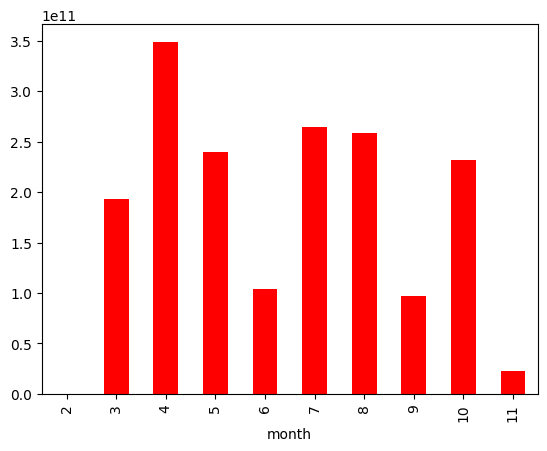

In [6]:
# mi creo una "variabile" vendite mensili per potermela gestire quando andro' a plottare
vendite_mensili = df.groupby('month')['total_sales'].sum()
print("Vendite totali per mese:\n", vendite_mensili)
vendite_mensili.plot(kind="bar", color='red')

In [8]:
#PUNTO 3. analisi di una correlazione incrociata
# converto la colonna 'date' nel formato datetime e creo 'day_of_week'
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

# calcolo il prezzo medio del biglietto per giorno della settimana
prezzo_medio_per_giorno = df.groupby('day_of_week')['ticket_price'].mean()
prezzo_medio_per_giorno = prezzo_medio_per_giorno / 10000 #divido per la formattazione quando andrò a plottare

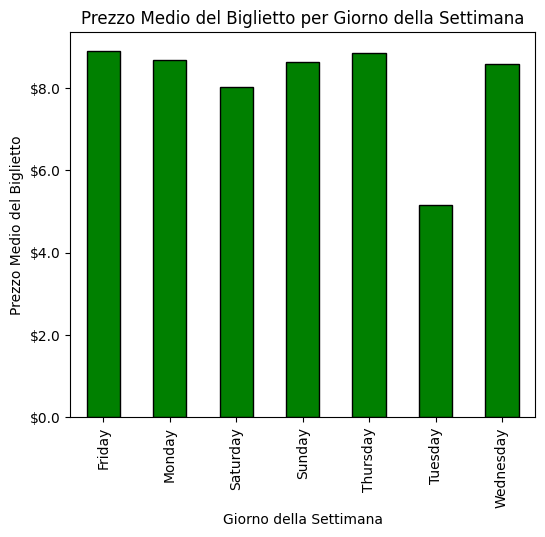

In [9]:
# visualizzazione della correlazione tra il giorno della settimana e del prezzo medio del biglietto quel giorno
plt.figure(figsize=(6, 5))
prezzo_medio_per_giorno.plot(kind='bar', color='green', edgecolor='black')
plt.title('Prezzo Medio del Biglietto per Giorno della Settimana')
plt.xlabel('Giorno della Settimana')
plt.ylabel('Prezzo Medio del Biglietto')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:.1f}')) #metodo per mettere il dollaro nella label dell'asse y, sfrutto gca
plt.show()

In [10]:
# PUNTO 4. quali giorni della settimana generano più vendite.
# calcolo la distribuzione giornaliera
vendite_giornaliere = df.groupby('day_of_week')['total_sales'].sum()
percentuale_vendite = (vendite_giornaliere / vendite_giornaliere.sum()) * 100


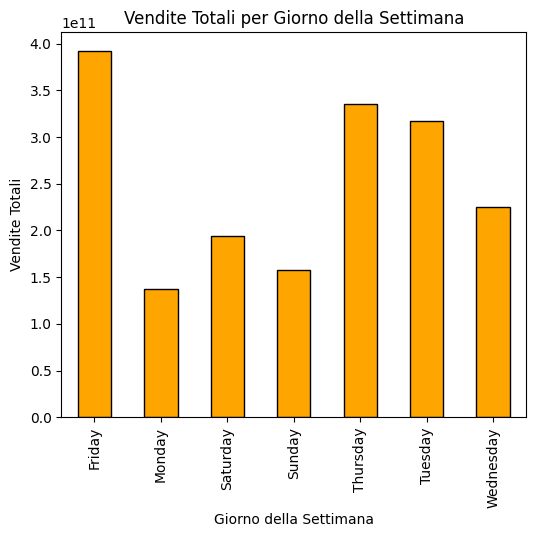

In [11]:
# creo un grafico a barre delle vendite
plt.figure(figsize=(6, 5))
vendite_giornaliere.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Vendite Totali per Giorno della Settimana')
plt.xlabel('Giorno della Settimana')
plt.ylabel('Vendite Totali')
plt.show()

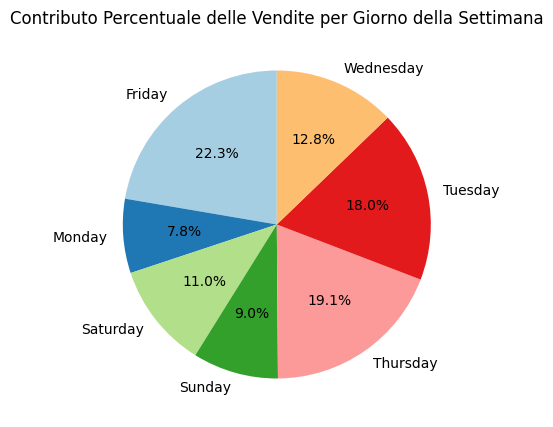

In [12]:
# creo un diagramma a torta della percentuale
plt.figure(figsize=(5, 5))
percentuale_vendite.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Contributo Percentuale delle Vendite per Giorno della Settimana')
plt.ylabel('')  # rimuovo l'etichetta sull'asse Y
plt.show()

Coefficiente angolare: 251.28644528920665
Intercetta: -8065878.43243718


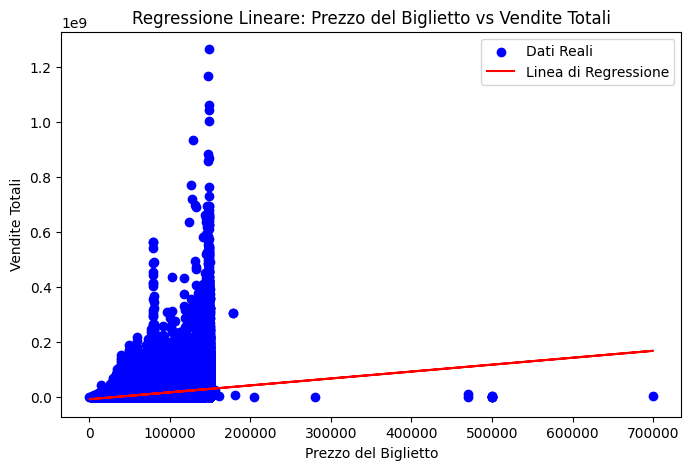

In [13]:
# PUNTO 5. la regressione lineare
# analizzo la relazione tra "Prezzo del Biglietto" e di "Vendite Totali"
# preparo le variabili indipendente e dipendente 

#array monodimensionali (altrimenti mi dava errore)
X = df['ticket_price'].values
y = df['total_sales'].values

# calcolo la media di X e y
media_X = np.mean(X)
media_y = np.mean(y)

# calcolo il coefficiente angolare (b1) e l'intercetta (b0)
numeratore = np.sum((X - media_X) * (y - media_y))  # prodotto scalare
denominatore = np.sum((X - media_X)**2)            # varianza di X
coefficiente_angolare = numeratore / denominatore
intercetta = media_y - coefficiente_angolare * media_X

# stampo i risultati della regressione per vederli scritti
print(f"Coefficiente angolare: {coefficiente_angolare}")
print(f"Intercetta: {intercetta}")

# definisco una funzione per fare previsioni basate sulla regressione, come nell'esercizio della moneta
def previsioni(prezzo):
    return intercetta + coefficiente_angolare * prezzo

# calcolo le previsioni e visualizzo i risultati
y_pred = previsioni(X)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Dati Reali')
plt.plot(X, y_pred, color='red', label='Linea di Regressione')
plt.title('Regressione Lineare: Prezzo del Biglietto vs Vendite Totali')
plt.xlabel('Prezzo del Biglietto')
plt.ylabel('Vendite Totali')
plt.legend()
plt.show()